 <img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2017


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binario utilizando Naive Bayes:
1. Naive Bayes Gaussiano (continuo)
2. Naive Bayes Multimodal (discreto)

<hr>
# Naive Bayes Gaussiano

- Asume que las características $X$ del objeto a describir tienen una distribución normal o Gaussiana.
- A partir de este supuesto, es posible modelar cada característica a través de la media y varianza de los ejemplos en el dataset.
- Este clasificador se utiliza en los casos en que las características del objeto que se desea clasificar son contínuas.
- Este clasificador no requiere parámetros ingresados.

<hr>
# Teorema de Bayes
Este clasificador utiliza el teorema de Bayes para determinar la probabilidad de que un objeto $x$ pertenezca a una clase $C$. El teorema de Bayes se define como:

Sea: $x = [{x_1,x_2,...,x_n}]$

Entonces,

## <center>$p(C_k \mid x_k) = \frac {p(C_k)p(x \mid C_k)}{p(x)}$ </center>

<hr>
La ecuación anterior puede entenderse como:

## <center>$posterior = \frac {prior*likelihood}{evidence}$</center>

Debido a que $p(x)$ no depende de la clase, este término puede ser omitido quedando así:

## <center>$p(C_k \mid x) = {p(C_k)p(x \mid C_k)}$ </center>

Donde $p(C_k)$ es la probabilidad de la clase $k$ y $p(x_i \mid C_k)$ es la probabilidad de que el vector de características $x$ aparezca en la clase $k$.

<hr>
# Clasificación

Utilizando el teorema anterior, tenemos entonces que la clase $\hat{y}$ a la que pertenece un objeto con características $x$ se define como:

## <center>$\hat{y} = \underset{k \in 1,...,K}{argmax}\left( p(C_k)p(x \mid C_k) \right)$</center>

Donce $K$ es el número de clases del problema.
<br>

### <center><font color=red>Recordemos que para un problema de clasificación binaria $K=2$</font></center>

<hr>
# Prior $p(C_k)$

Este término hace referencia a lo que se sabe de la clase antes de tener alguna nueva evidencia. Esto se puede entender como la probabilidad neta de que la clase aparezca en el dataset, lo cuál es igual al número de elementos que pertenecen a la clase $C_k$ divido sobre el total de elementos del dataset:

## <center>$p(C_k) = \frac {len(x \in C_k)}{M}$</center>

Donde $M$ es el número de ejemplos en el dataset.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prior(Y):
    '''
    Compute priors for classes C_k in dataset (X,Y)
    
    Arguments:
        Y -- labels / classes dataset. numpy array of shape (M, 1)
    Returns:
        p -- dictionary with priors for each class. {class_1_prior_1,...,class_n:prior_n}
    '''
    p = {} #dictionary of priors
    
    M = np.float(Y.shape[0])
    
    labels = np.unique(Y) #get unique labels
        
    for label in labels:
        p[str(label)] = np.count_nonzero(Y == label) / np.float(M)
    
    return p

In [4]:
Y = np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]])

print (prior(Y))

{'1': 0.5, '0': 0.5}


<hr>
## Likelihood (Gaussian)$p(C_k \mid x)$

Se obtiene calculando la probabilidad de que cada característica $x_i \in x$ aparezca en datos de la clase $C_k$. En este caso, si asumimos una distribución Gaussiana, tenemos que:

## <center>$p(x_i\mid C_i)={1 \over { \sqrt{2 \pi \sigma^2} }}exp\left ( { {-(x_i-\mu)^2} \over {2 \sigma^2} } \right )$</center>

donde,

### <center>$\mu = media(X \in C_i)$</center>
### <center>$\sigma^2 = varianza(X \in C_i)$</center>

Ahora, para todas las características tenemos que:

## <center>$p(x \mid C_k) = \prod_{i=1}^{n_x}p(x_i \mid C_k)$</center>

Donde $n_x$ es el número de características.

In [14]:
def gaussian_likelihood(mean, variance, x):
    '''
    Calculates Gaussian likelihood of x to appear in data of an unknown class
    with mean=mean and variance=variance.
    
    Arguments:
        mean -- numpy array of statistical mean of data associated to x
        variance -- numpy array of statistical variance of data associated to x
        x -- numpy array containing a feature vector
    '''
    a = 1. / np.sqrt(2.*np.pi*variance)
    b = np.exp( (-(x-mean)**2.) / (2.*variance) )
    p = np.multiply(a,b)
        
    return np.prod(p)

In [11]:
print gaussian_likelihood(np.array([7,100,11]), np.array([0.01, 1.012292, 0.91667]), np.array([6, 130, 8]))

8.18150145053e-218


<hr>
# Implementemos un ejemplo!

Analicemos el siguientes dataset de clasificación binaria:

<img src="res/naive_bayes/example.png">

y clasifiquemos el siguiente objeto utilizando Naive Bayes Gaussiano:

## <center>$x=[6,130,8]$</center>

Utilicemos las funciones implementadas:

- prior(Y)
- gaussian_likelihood(mean, variance, x)

In [10]:
#definamos el dataset (X,Y)
X = np.array([[6, 180, 12],[5.92, 190, 11],[5.58, 170, 12],[5.92, 165, 10],
              [5, 100, 6],[5.5, 100, 8],[5.42, 130, 7],[5.75, 150, 9]])
#asumamos hombre:0 y mujer:1
Y = np.array([[0],[0],[0],[0],[1],[1],[1],[1]])

In [11]:
#1. Calculemos el prior de las clases
p_C = prior(Y)
print p_C

{'1': 0.5, '0': 0.5}


In [12]:
#2. Calculemos medias y varianzas por caracteristicas y clases

X_hombre = X[np.squeeze(Y==0)]
X_mujer = X[np.squeeze(Y==1)]

media_hombre = np.mean(X_hombre, axis=0)
media_mujer = np.mean(X_mujer, axis=0)

varianza_hombre = np.var(X_hombre, axis=0, ddof=1)
varianza_mujer = np.var(X_mujer, axis=0, ddof=1)

print media_hombre, varianza_hombre
print media_mujer, varianza_mujer

[   5.855  176.25    11.25 ] [  3.50333333e-02   1.22916667e+02   9.16666667e-01]
[   5.4175  120.        7.5   ] [  9.72250000e-02   6.00000000e+02   1.66666667e+00]


In [20]:
#3. Calculemos el likelihood para el objeto x

x = np.array([6, 180, 12]) #objeto a clasificar
#x = np.array([6, 180, 8])


p_x_hombre = gaussian_likelihood(media_hombre, varianza_hombre, x)
p_x_mujer = gaussian_likelihood(media_mujer, varianza_mujer, x)

print p_x_hombre, p_x_mujer

0.0164500212828 1.28764168708e-07


In [21]:
# 4. Calculemos el posterior para cada clase

posterior_hombre_x = p_C["0"] * p_x_hombre
posterior_mujer_x = p_C["1"] * p_x_mujer

print posterior_hombre_x / (posterior_hombre_x + posterior_mujer_x)
print posterior_mujer_x / (posterior_hombre_x + posterior_mujer_x)

0.999992172462
7.82753764192e-06


In [17]:
# 5. Clasifiquemos
labels = np.array(["hombre", "mujer"])

posteriors = np.array([posterior_hombre_x, posterior_mujer_x])

class_index = np.argmax(posteriors)

print("La clase del objeto x con caracteristicas: ", x, "es: ", labels[class_index])

('La clase del objeto x con caracteristicas: ', array([  6, 130,   8]), 'es: ', 'mujer')


<hr>
# Gaussian Naive Bayes en SKLEARN

In [25]:
from utils import generate_data, visualize, plot_decision_boundary
import matplotlib.pyplot as plt

In [33]:
X, Y = generate_data('blobs')

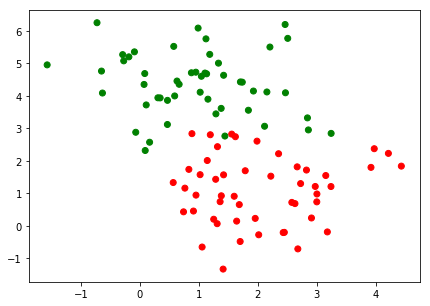

In [34]:
color= ['red' if y == 1 else 'green' for y in Y]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB

neigh = GaussianNB()
neigh.fit(X, Y)

GaussianNB(priors=None)

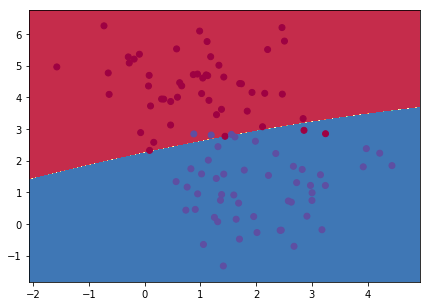

In [36]:
visualize(X, Y, neigh)